# Load data

In [49]:
import pandas as pd
from config import *

df = pd.read_csv(EMBEDED_FILEPATH)

In [50]:
df.dtypes[:15]

country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
svd_0                    float64
svd_1                    float64
dtype: object

In [51]:
target_col = "points"

In [52]:
nan_stats = df.isnull().mean(axis=0)
columns_to_drop = nan_stats.index[nan_stats > 0]
columns_to_drop

Index(['country', 'designation', 'price', 'province', 'region_1', 'region_2',
       'taster_name', 'taster_twitter_handle', 'variety'],
      dtype='object')

# Train test split

In [53]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

# Version 1

## Feature selection

In [54]:
use_columns = train_df.select_dtypes(include="number").columns
use_columns = use_columns.drop(target_col, errors='ignore')
use_columns = use_columns.drop(columns_to_drop, errors='ignore')
use_columns

Index(['svd_0', 'svd_1', 'svd_2', 'svd_3', 'svd_4', 'svd_5', 'svd_6', 'svd_7',
       'svd_8', 'svd_9',
       ...
       'svd_118', 'svd_119', 'svd_120', 'svd_121', 'svd_122', 'svd_123',
       'svd_124', 'svd_125', 'svd_126', 'svd_127'],
      dtype='object', length=128)

In [55]:
all_results = []

## Model

In [56]:
from sklearn.linear_model import LinearRegression

X = train_df[use_columns]
y = train_df[target_col]

model = LinearRegression(fit_intercept=True)

model.fit(X, y)

print("Intercept: ", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept:  86.5902009826881
Coefficients:  [ 13.02393789   3.94682539   2.50462123   3.6840733  -13.65311598
   6.29596986   0.56287557  -9.67839555  -0.71960733   5.18581683
  14.09240211  -2.15675744  -0.59136789  -2.51351074   2.04844619
  10.13222197  -8.16658762   4.55330869   0.50847011  -5.43629046
   3.76218506   0.51673251   1.95269223  11.79900015  -3.9070612
  -3.49359089  -5.54496331   5.12937828  -2.08181845  -6.51811641
  -4.41714373   3.46008304  -1.12795998  -3.40807313  -1.20614381
   1.94521789  -5.61081704  -2.6287679   -7.01475859   7.60415923
  -1.72241246   3.3447641    1.02468998  -3.7658695   -0.92317479
   5.83945414  -2.22356891  -4.52721296  -0.73158974  -0.62089788
  -1.86676483  -0.90169127  -0.14398834   2.10628639   0.54295114
  -2.41966302   1.20924194   3.34452542   5.01289467   0.97438516
   1.28299168  -3.62911558   2.17030206   2.76876306   4.58747103
   0.05657878  -2.65699955  -1.27767354  -3.79686659  -1.13343407
  -0.29723592   1.95337721  -0.19

## Evaluation

In [57]:
X_test = test_df[use_columns]
y_test = test_df[target_col]

y_pred = model.predict(X_test)

## Metrics

In [58]:
import sklearn.metrics as skm

rsc = model.score(X_test, y_test)
mse = skm.mean_squared_error(y_test, y_pred)
mape = skm.mean_absolute_percentage_error(y_test, y_pred)
mae = skm.mean_absolute_error(y_test, y_pred)

all_results.append(dict(variant="1-basic", MSE=mse, MAE=mae, MAPE=mape, Rsq=rsc))

pd.DataFrame(all_results)

,variant,MSE,MAE,MAPE,Rsq
0,1-basic,4.954765,1.76352,0.019938,0.471513


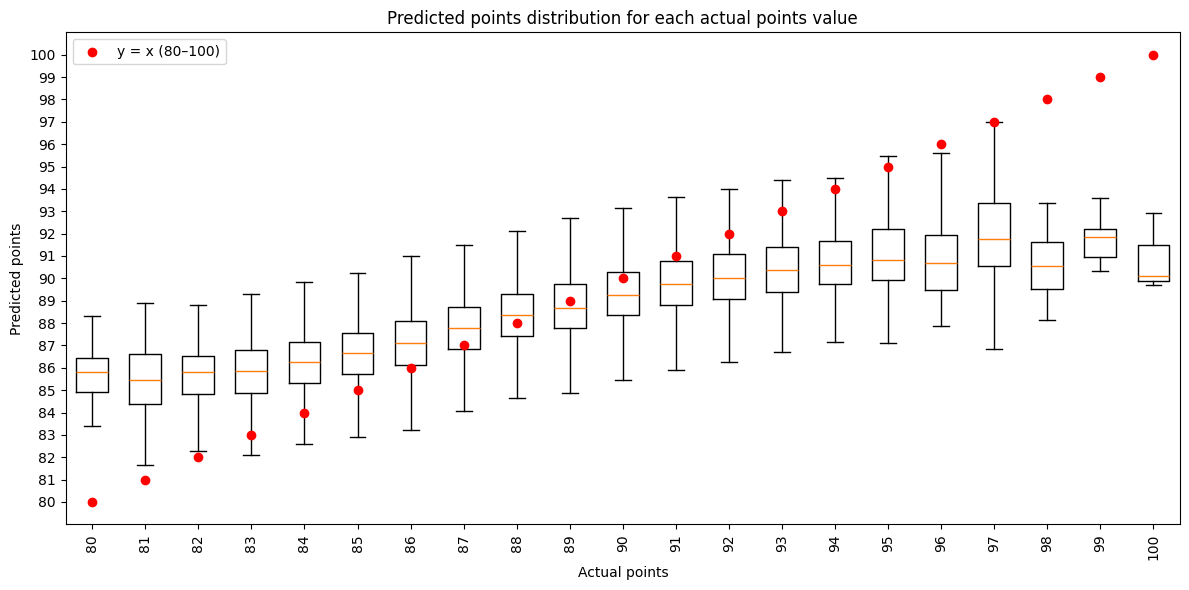

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pred_vs_actual = pd.DataFrame({
    "points": y_test,
    "predicted_points": y_pred
})

forced_points = list(range(80, 101))

data = [
    pred_vs_actual.loc[pred_vs_actual["points"] == p, "predicted_points"]
    if (pred_vs_actual["points"] == p).any()
    else pd.Series(dtype=float)
    for p in forced_points
]
plt.figure(figsize=(12, 6))
plt.boxplot(
    data,
    positions=range(1, len(forced_points) + 1),
    widths=0.6,
    showfliers=False
)

x_pos = {p: i + 1 for i, p in enumerate(forced_points)}
xs = [x_pos[p] for p in forced_points]
ys = forced_points
plt.scatter(xs, ys, color="red", zorder=3, label="y = x (80–100)")

plt.xticks(
    ticks=range(1, len(forced_points) + 1),
    labels=forced_points,
    rotation=90
)
plt.yticks(forced_points)
plt.xlabel("Actual points")
plt.ylabel("Predicted points")
plt.title("Predicted points distribution for each actual points value")
plt.legend()
plt.tight_layout()
plt.show()